# Step 01: Importing Data and Initial Data Exploration

In [49]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [50]:
# Load the dataset
df = pd.read_excel('COVID-19 Daily.xlsx')
df.head()

,Date,Daily Tests,Daily Cases,Daily Recoveries,Daily Deaths
0,2020-02-26,NaN,0.0,NaN,NaN
1,2020-02-27,NaN,NaN,NaN,NaN
2,2020-02-28,NaN,NaN,NaN,NaN
3,2020-02-29,NaN,0.0,NaN,NaN
4,2020-03-01,NaN,NaN,NaN,NaN


In [51]:
# Check for null values
df.isnull().sum()

Date                 0
Daily Tests         13
Daily Cases         11
Daily Recoveries    15
Daily Deaths        57
dtype: int64

In [52]:
# Display column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              188 non-null    datetime64[ns]
 1   Daily Tests       175 non-null    float64       
 2   Daily Cases       177 non-null    float64       
 3   Daily Recoveries  173 non-null    float64       
 4   Daily Deaths      131 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.5 KB


In [53]:
# Get descriptive statistics
df.describe()

,Date,Daily Tests,Daily Cases,Daily Recoveries,Daily Deaths
count,188,175.000000,177.000000,173.000000,131.000000
mean,2020-05-29 12:00:00,14927.297143,1673.028249,1590.930636,42.511450
min,2020-02-26 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,2020-04-12 18:00:00,6403.500000,432.000000,172.000000,7.000000
50%,2020-05-29 12:00:00,16387.000000,990.000000,677.000000,32.000000
75%,2020-07-15 06:00:00,22975.000000,2603.000000,2041.000000,70.500000
max,2020-08-31 00:00:00,31681.000000,6825.000000,16813.000000,153.000000
std,NaN,9259.243109,1681.158547,2490.639106,38.332426


# Step 02: Daily Tests, Cases, Recoveries, and Deaths Analysis

In [54]:
# Total tests till Sep 01, 2020
total_tests = df['Daily Tests'].sum()
print("Total Tests till Sep 01, 2020:", total_tests)

Total Tests till Sep 01, 2020: 2612277.0


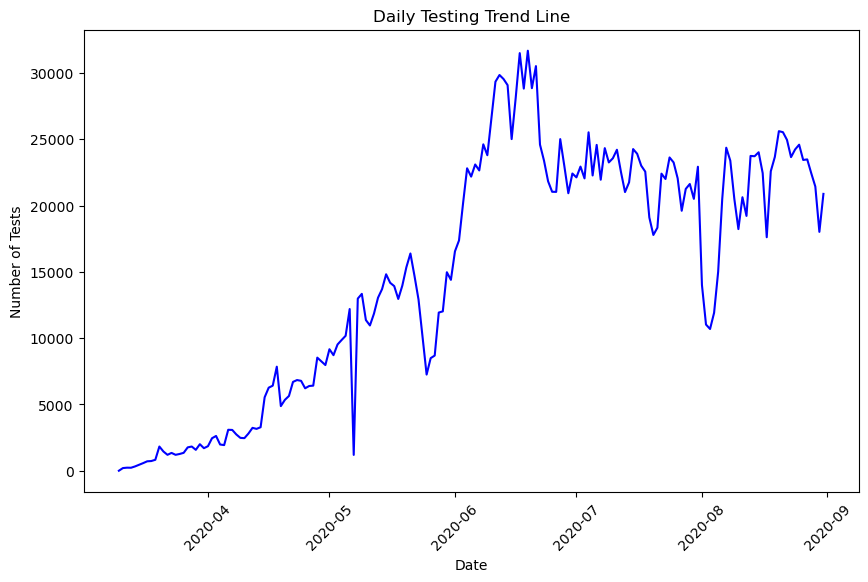

In [55]:
# Line plot for daily tests
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Daily Tests'], label='Daily Tests', color='blue')
plt.title('Daily Testing Trend Line')
plt.xlabel('Date')
plt.ylabel('Number of Tests')
plt.xticks(rotation=45)
plt.show()

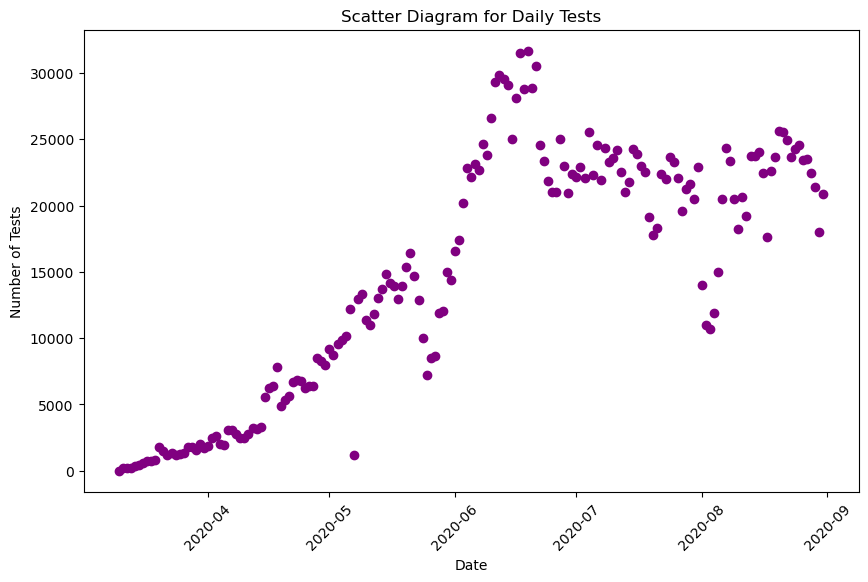

In [56]:
# Scatter plot for daily tests
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Daily Tests'], color='purple')
plt.title('Scatter Diagram for Daily Tests')
plt.xlabel('Date')
plt.ylabel('Number of Tests')
plt.xticks(rotation=45)
plt.show()

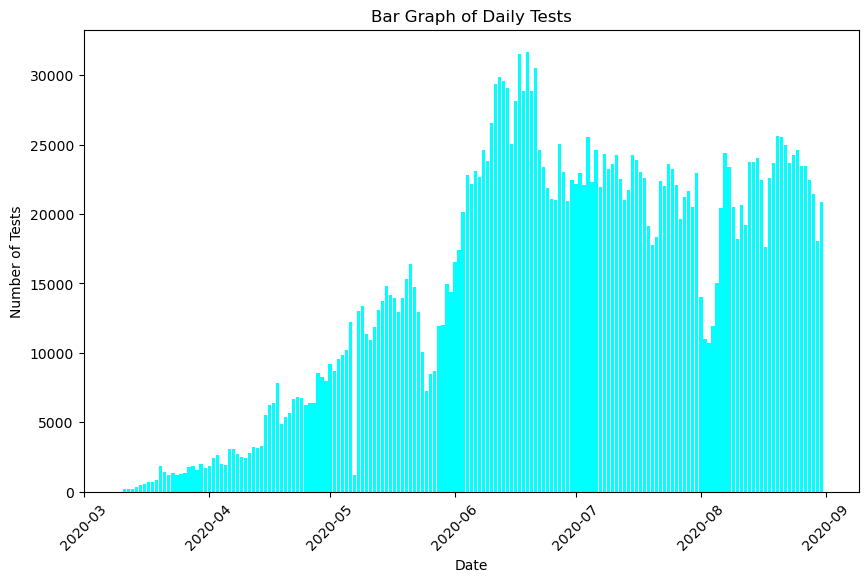

In [57]:
# Bar graph for daily tests
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Daily Tests'], color='cyan')
plt.title('Bar Graph of Daily Tests')
plt.xlabel('Date')
plt.ylabel('Number of Tests')
plt.xticks(rotation=45)
plt.show()

In [58]:
# Scatter plot for above-average (red) and below-average (green) tests
avg_tests = df['Daily Tests'].mean()

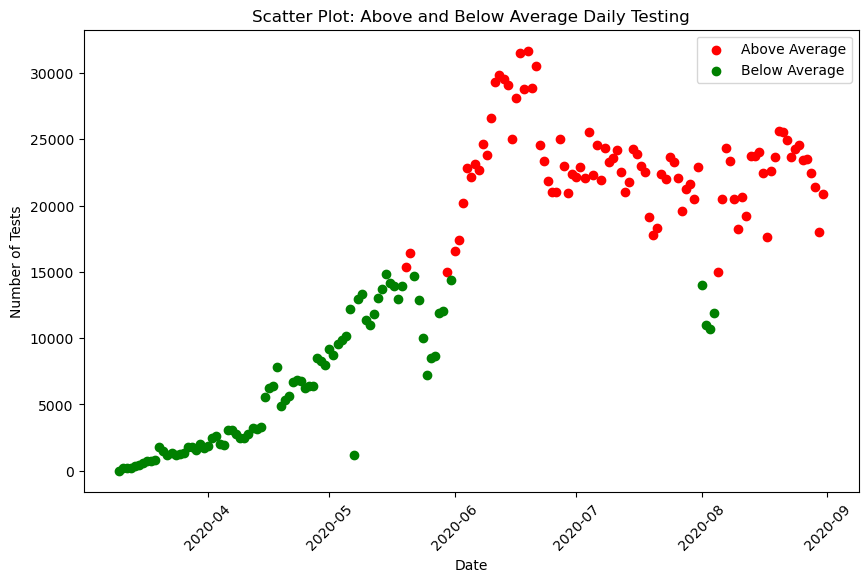

In [59]:
# Filter above and below average
above_avg = df[df['Daily Tests'] > avg_tests]
below_avg = df[df['Daily Tests'] <= avg_tests]

plt.figure(figsize=(10, 6))
plt.scatter(above_avg['Date'], above_avg['Daily Tests'], color='red', label='Above Average')
plt.scatter(below_avg['Date'], below_avg['Daily Tests'], color='green', label='Below Average')
plt.title('Scatter Plot: Above and Below Average Daily Testing')
plt.xlabel('Date')
plt.ylabel('Number of Tests')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Step 03: Weekly and Monthly Aggregation

In [60]:
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

In [61]:
# Resampling for weekly and monthly stats
weekly_df = df.resample('W-Mon', on='Date').sum()  # Weekly data ending on Mondays
monthly_df = df.resample('M', on='Date').sum()  # Monthly data

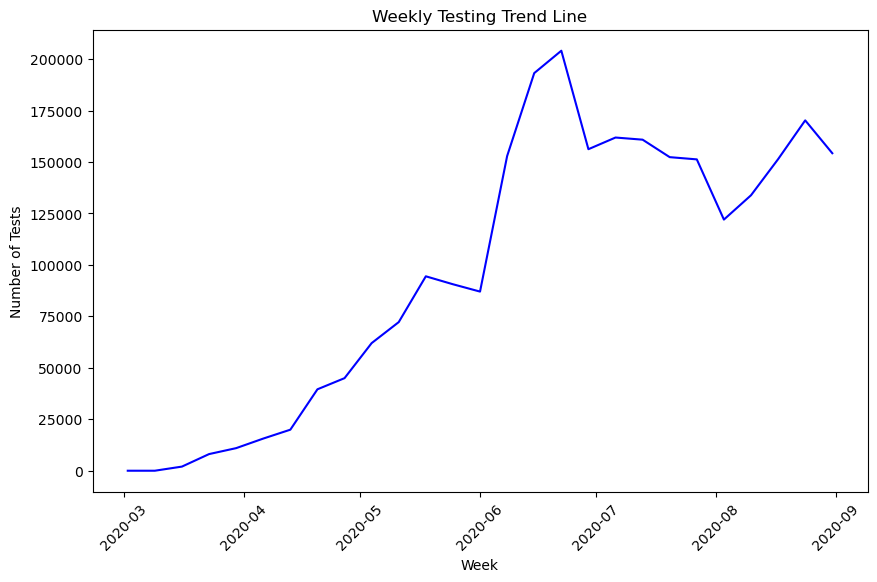

In [62]:
# Plot Weekly trends
plt.figure(figsize=(10, 6))
plt.plot(weekly_df.index, weekly_df['Daily Tests'], color='blue', label='Weekly Tests')
plt.title('Weekly Testing Trend Line')
plt.xlabel('Week')
plt.ylabel('Number of Tests')
plt.xticks(rotation=45)
plt.show()

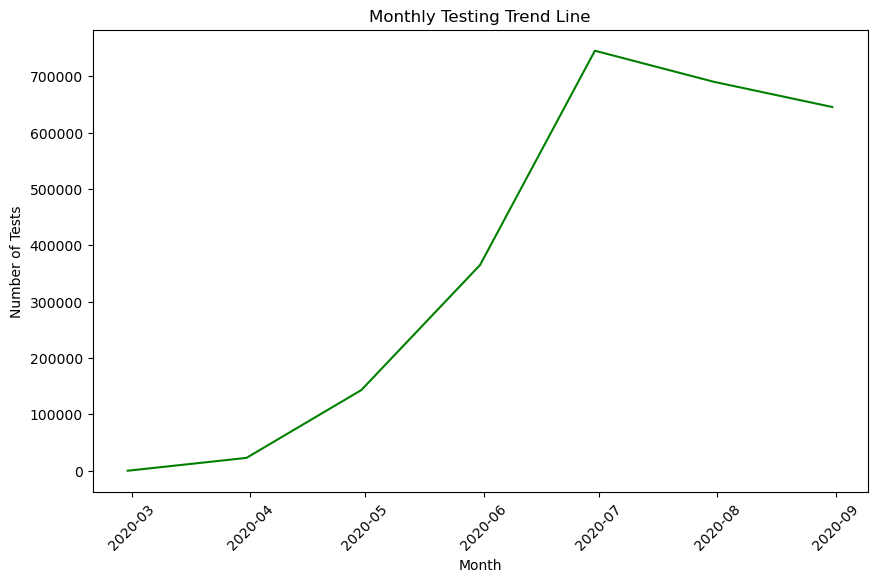

In [63]:
#PLot Monthly trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_df.index, monthly_df['Daily Tests'], color='green', label='Monthly Tests')
plt.title('Monthly Testing Trend Line')
plt.xlabel('Month')
plt.ylabel('Number of Tests')
plt.xticks(rotation=45)
plt.show()

In [64]:
# Save weekly and monthly data to new Excel files
weekly_df.to_excel('Weekly_Stats.xlsx', index=True)
monthly_df.to_excel('Monthly_Stats.xlsx', index=True)

In [65]:
# Find max and min for weekly and monthly stats
max_weekly_tests = weekly_df['Daily Tests'].idxmax(), weekly_df['Daily Tests'].max()
min_weekly_tests = weekly_df['Daily Tests'].idxmin(), weekly_df['Daily Tests'].min()
max_monthly_tests = monthly_df['Daily Tests'].idxmax(), monthly_df['Daily Tests'].max()
min_monthly_tests = monthly_df['Daily Tests'].idxmin(), monthly_df['Daily Tests'].min()

print("Max Weekly Tests:", max_weekly_tests)
print("Min Weekly Tests:", min_weekly_tests)
print("Max Monthly Tests:", max_monthly_tests)
print("Min Monthly Tests:", min_monthly_tests)

Max Weekly Tests: (Timestamp('2020-06-22 00:00:00'), 204096.0)
Min Weekly Tests: (Timestamp('2020-03-02 00:00:00'), 0.0)
Max Monthly Tests: (Timestamp('2020-06-30 00:00:00'), 745419.0)
Min Monthly Tests: (Timestamp('2020-02-29 00:00:00'), 0.0)


# Step 04: Per Thousand & Million Stats Calculation

In [99]:
# Population number
population = 1000000

In [100]:
# Calculate Cases Per Thousand
df['Cases Per Thousand'] = (df['Daily Cases'] / population) * 1000

In [101]:
# Calculate Cases Per Million
df['Cases Per Million'] = (df['Daily Cases'] / population) * 1000000

In [102]:
# Calculate Positive Rate
df['Positive Rate'] = (df['Daily Cases'] / df['Daily Tests']) * 100

In [103]:
df.head()

,Date,Daily Tests,Daily Cases,Daily Recoveries,Daily Deaths,Cases Per Thousand,Cases Per Million,Positive Rate,Days
13,2020-03-10,0.0,1.0,1.0,0.0,0.001,1.0,inf,0
14,2020-03-11,200.0,1.0,1.0,0.0,0.001,1.0,0.500000,1
15,2020-03-12,230.0,1.0,0.0,0.0,0.001,1.0,0.434783,2
16,2020-03-13,225.0,7.0,1.0,0.0,0.007,7.0,3.111111,3
17,2020-03-14,325.0,3.0,0.0,0.0,0.003,3.0,0.923077,4


# Step 05: Model Training and Prediction

In [71]:
# Drop rows with missing values in X and y
df.dropna(inplace=True)

In [72]:
# Feature selection
df['Date'] = pd.to_datetime(df['Date'])
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

In [73]:
# Select relevant features
X = df[['Days']]
y_cases = df['Daily Cases']
y_deaths = df['Daily Deaths']

In [74]:
# Split the data into training and testing sets (80% train, 20% test)
X_train_cases, X_test_cases, y_train_cases, y_test_cases = train_test_split(X, y_cases, test_size=0.2, random_state=42)
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(X, y_deaths, test_size=0.2, random_state=42)

# Model 1: Linear Regression for Daily Cases and Deaths

In [75]:
# Train the Linear Regression model for daily cases
lr_cases = LinearRegression()
lr_cases.fit(X_train_cases, y_train_cases)

LinearRegression()

In [76]:
# Predict on the test data (daily cases)
y_pred_cases_lr = lr_cases.predict(X_test_cases)

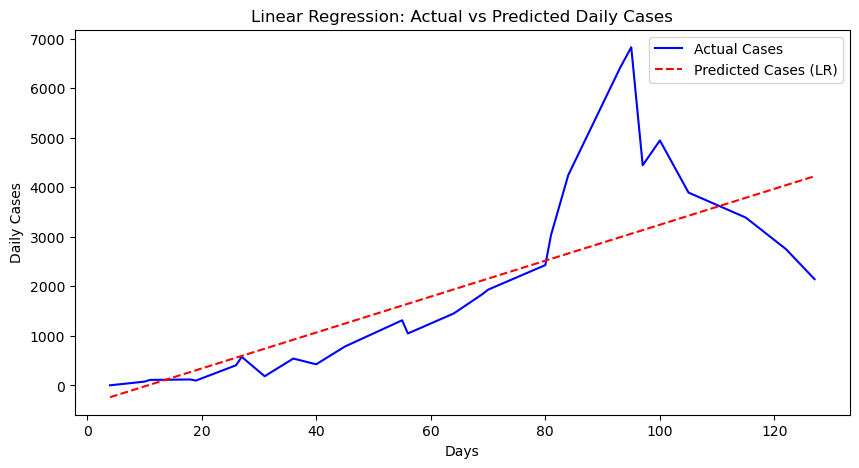

In [77]:
# Plot for Daily Cases - Linear Regression
plt.figure(figsize=(10, 5))
sns.lineplot(x=X_test_cases['Days'].values.flatten(), y=y_test_cases, label='Actual Cases', color='blue')
sns.lineplot(x=X_test_cases['Days'].values.flatten(), y=y_pred_cases_lr, label='Predicted Cases (LR)', color='red', linestyle='dashed')
plt.xlabel('Days')
plt.ylabel('Daily Cases')
plt.title('Linear Regression: Actual vs Predicted Daily Cases')
plt.legend()
plt.show()

In [78]:
# Train the Linear Regression model for daily deaths
lr_deaths = LinearRegression()
lr_deaths.fit(X_train_deaths, y_train_deaths)

LinearRegression()

In [79]:
# Predict on the test data (daily deaths)
y_pred_deaths_lr = lr_deaths.predict(X_test_deaths)

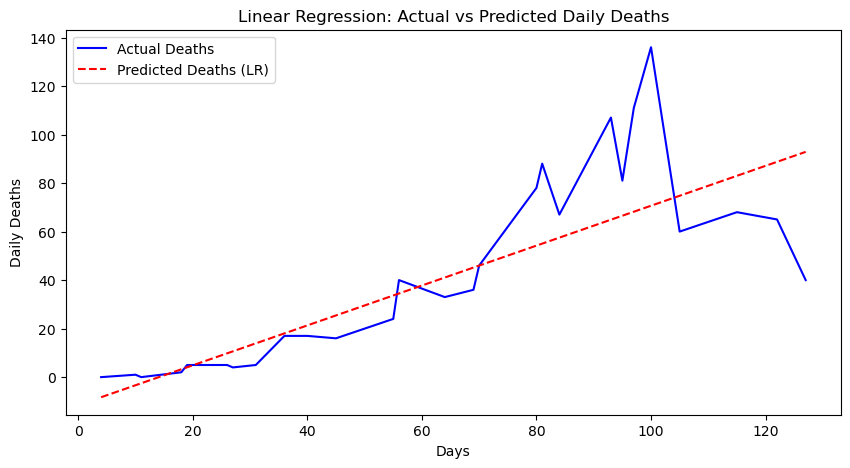

In [80]:
# Plot for Daily Deaths - Linear Regression
plt.figure(figsize=(10, 5))
sns.lineplot(x=X_test_deaths['Days'].values.flatten(), y=y_test_deaths, label='Actual Deaths', color='blue')
sns.lineplot(x=X_test_deaths['Days'].values.flatten(), y=y_pred_deaths_lr, label='Predicted Deaths (LR)', color='red', linestyle='dashed')
plt.xlabel('Days')
plt.ylabel('Daily Deaths')
plt.title('Linear Regression: Actual vs Predicted Daily Deaths')
plt.legend()
plt.show()

# Model 2: Random Forest Regressor for Daily Cases and Deaths

In [81]:
# Train the Random Forest model for daily cases
rf_cases = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cases.fit(X_train_cases, y_train_cases)

RandomForestRegressor(random_state=42)

In [82]:
# Predict on the test data (daily cases)
y_pred_cases_rf = rf_cases.predict(X_test_cases)

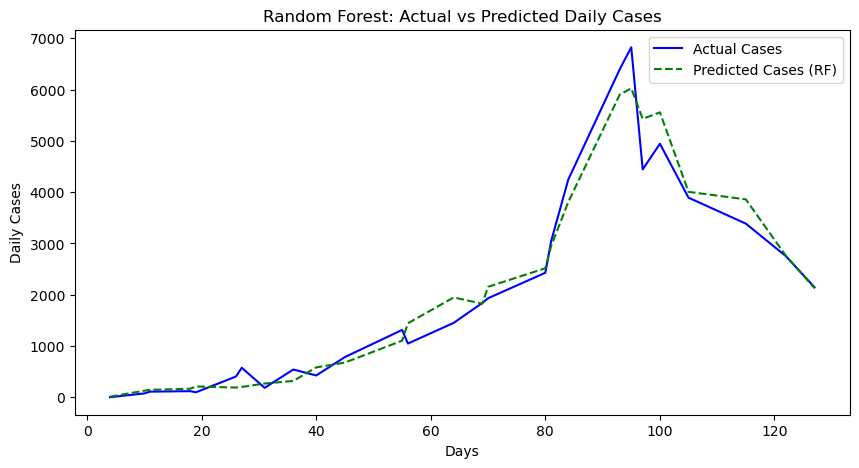

In [83]:
# Plot for Daily Cases - Random Forest
plt.figure(figsize=(10, 5))
sns.lineplot(x=X_test_cases['Days'].values, y=y_test_cases, label='Actual Cases', color='blue')
sns.lineplot(x=X_test_cases['Days'].values, y=y_pred_cases_rf, label='Predicted Cases (RF)', color='green', linestyle='dashed')
plt.xlabel('Days')
plt.ylabel('Daily Cases')
plt.title('Random Forest: Actual vs Predicted Daily Cases')
plt.legend()
plt.show()

In [84]:
# Train the Random Forest model for daily deaths
rf_deaths = RandomForestRegressor(n_estimators=100, random_state=42)
rf_deaths.fit(X_train_deaths, y_train_deaths)

RandomForestRegressor(random_state=42)

In [85]:
# Predict on the test data (daily deaths)
y_pred_deaths_rf = rf_deaths.predict(X_test_deaths)

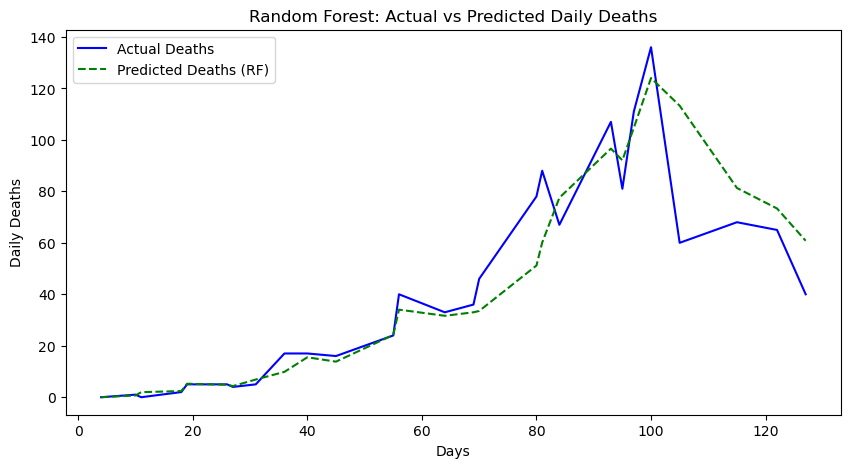

In [86]:
# Plot for Daily Deaths - Random Forest
plt.figure(figsize=(10, 5))
sns.lineplot(x=X_test_deaths['Days'].values, y=y_test_deaths, label='Actual Deaths', color='blue')
sns.lineplot(x=X_test_deaths['Days'].values, y=y_pred_deaths_rf, label='Predicted Deaths (RF)', color='green', linestyle='dashed')
plt.xlabel('Days')
plt.ylabel('Daily Deaths')
plt.title('Random Forest: Actual vs Predicted Daily Deaths')
plt.legend()
plt.show()

In [87]:
### Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f'{model_name} - MSE: {mse}, MAE: {mae}')

In [88]:
# Evaluate for daily cases
evaluate_model(y_test_cases, y_pred_cases_lr, "Linear Regression (Cases)")
evaluate_model(y_test_cases, y_pred_cases_rf, "Random Forest (Cases)")

Linear Regression (Cases) - MSE: 1538059.8627251575, MAE: 794.622917186838
Random Forest (Cases) - MSE: 128536.61097777773, MAE: 254.75333333333333


In [89]:
# Evaluate for daily deaths
evaluate_model(y_test_deaths, y_pred_deaths_lr, "Linear Regression (Deaths)")
evaluate_model(y_test_deaths, y_pred_deaths_rf, "Random Forest (Deaths)")

Linear Regression (Deaths) - MSE: 527.8298228550557, MAE: 15.637506077526098
Random Forest (Deaths) - MSE: 215.05075185185186, MAE: 8.878888888888888


# Future Predictions

In [90]:
# Future predictions (next 30 days)
future_days = np.array([i for i in range(df['Days'].max() + 1, df['Days'].max() + 31)]).reshape(-1, 1)

In [91]:
# Predict future trends for Linear Regression
future_cases_lr = lr_cases.predict(future_days)
future_deaths_lr = lr_deaths.predict(future_days)

In [92]:
# Predict future trends for Random Forest
future_cases_rf = rf_cases.predict(future_days)
future_deaths_rf = rf_deaths.predict(future_days)

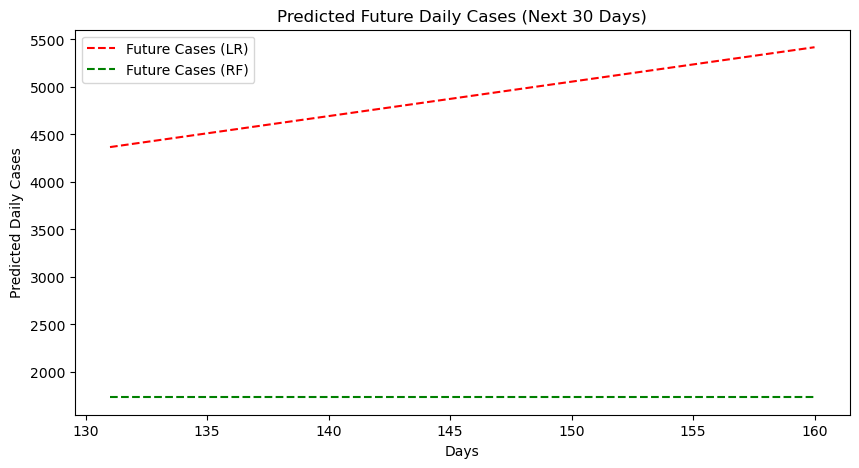

In [93]:
# Plot Future Trends for Daily Cases
plt.figure(figsize=(10, 5))
sns.lineplot(x=future_days.flatten(), y=future_cases_lr, label='Future Cases (LR)', color='red', linestyle='dashed')
sns.lineplot(x=future_days.flatten(), y=future_cases_rf, label='Future Cases (RF)', color='green', linestyle='dashed')
plt.xlabel('Days')
plt.ylabel('Predicted Daily Cases')
plt.title('Predicted Future Daily Cases (Next 30 Days)')
plt.legend()
plt.show()

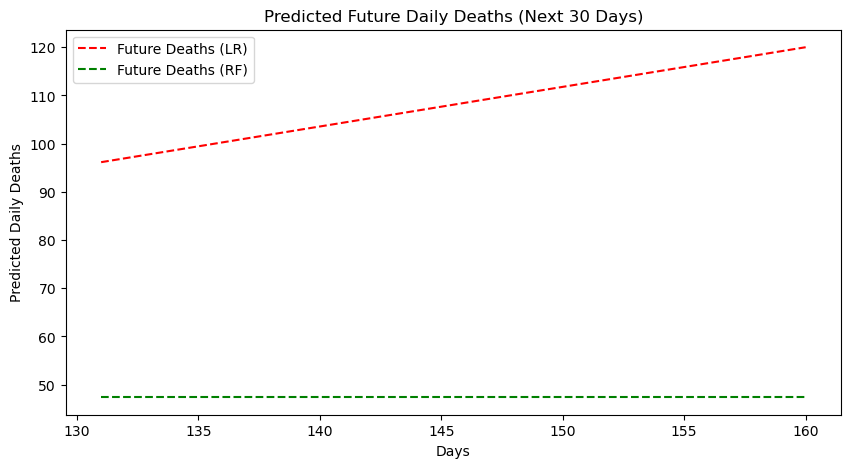

In [94]:
# Plot Future Trends for Daily Deaths
plt.figure(figsize=(10, 5))
sns.lineplot(x=future_days.flatten(), y=future_deaths_lr, label='Future Deaths (LR)', color='red', linestyle='dashed')
sns.lineplot(x=future_days.flatten(), y=future_deaths_rf, label='Future Deaths (RF)', color='green', linestyle='dashed')
plt.xlabel('Days')
plt.ylabel('Predicted Daily Deaths')
plt.title('Predicted Future Daily Deaths (Next 30 Days)')
plt.legend()
plt.show()